In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

### loading data

In [2]:
f = h5py.File("datasets/train_catvnoncat.h5", "r")
train_set_x_org = np.array(f["train_set_x"][:])
train_set_y_org = np.array(f["train_set_y"][:]).reshape(1,-1)
label = f["list_classes"][:]

f = h5py.File("datasets/test_catvnoncat.h5", "r")
test_set_x_org = np.array(f["test_set_x"][:])
test_set_y_org = np.array(f["test_set_y"][:]).reshape(1,-1)

num_px=train_set_x_org.shape[1]

### reshape dataset

In [3]:
# reshape the original training set and testing set into X matrix
train_set_shape = train_set_x_org.shape
train_set_x_flatten = train_set_x_org.reshape(train_set_shape[0],-1).T
test_set_shape = test_set_x_org.shape
test_set_x_flatten = test_set_x_org.reshape(test_set_shape[0],-1).T

"To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel)."
————————————————
Above text was quoted from「wangyunpeng_bio」's article
URL：https://blog.csdn.net/qq_29300341/article/details/77600143

In [4]:
train_set_x = train_set_x_flatten/255
test_set_x =  test_set_x_flatten/255

In [5]:
print("The shape of training set is ",train_set_x.shape)

The shape of training set is  (12288, 209)


### logistic regression

In [6]:
# Initialize w, b
def Initialize(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def Sigmoid(z):
    return 1/(1+np.exp(-z))


# Forward and Backward propagation
def Pro(w, b, X, Y):
    # Forward propagation
    m = X.shape[1]
    z = np.dot(w.T, X)+b
    A = Sigmoid(z)
    cost = (-1/m) * np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)))

    # Backward propagation
    dz = A - Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)

    cost = np.square(cost)
    return dw, db, cost

# Optimization
def Opt(X, Y, w, b, learning_rate, num_iter, print_cost=False):
    costs = []
    for i in range(num_iter):
        dw, db, cost = Pro(w, b, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # record the cost
        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print("cost after iteration %i: %f" %(i, cost))

    params = {
        "w": w,
        "b": b
    }

    grads = {
        "dw": dw,
        "db": db
    }

    return params, grads, costs

### predict

In [7]:
def predict(X, Y, w, b):
    m = X.shape[1]
    w = w.reshape(X.shape[0],1)
    Y_hat = Sigmoid(np.dot(w.T, X) + b)
    Y_hat = np.where(Y_hat>0.5, 1, 0)
    return Y_hat

def model(train_set_x, test_set_x, train_set_y_org, test_set_y_org, learning_rate, num_iter, print_cost=False):
    w, b = Initialize(train_set_x.shape[0])
    params, grads, costs = Opt(train_set_x, train_set_y_org, w, b, learning_rate=learning_rate, num_iter=num_iter, print_cost=print_cost)
    w, b = params["w"], params["b"]

    train_Y_hat = predict(train_set_x, train_set_y_org, w, b)
    test_Y_hat = predict(test_set_x, test_set_y_org, w, b)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(train_Y_hat - train_set_y_org)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(test_Y_hat - test_set_y_org)) * 100))
    d={"cost":costs,"Y_prediction_train":train_Y_hat,"Y_prediction_test":test_Y_hat,"w":w,"b":b,"learning_rate":learning_rate,"num_ite":num_iter}
    return d

In [24]:
# main function
d = model(train_set_x, test_set_x, train_set_y_org, test_set_y_org, learning_rate=0.001, num_iter=1000, print_cost=True)

cost after iteration 0: 0.480453
cost after iteration 100: 0.349623
cost after iteration 200: 0.308909
cost after iteration 300: 0.279816
cost after iteration 400: 0.256929
cost after iteration 500: 0.238027
cost after iteration 600: 0.221943
cost after iteration 700: 0.207978
cost after iteration 800: 0.195674
cost after iteration 900: 0.184712
train accuracy: 86.60287081339713 %
test accuracy: 62.0 %


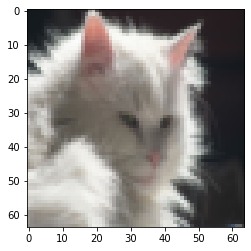

y = 1, you predicted that  
it's a cat.


In [25]:
# example of a picture
index = 8
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
plt.show()
print ("y = " + str(test_set_y_org[0,index]) + ", you predicted that  ")

if d["Y_prediction_test"][0,index]==1:
	print("it's a cat.")
else :
	print("it'not a cat")

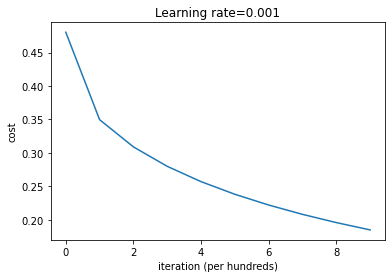

In [26]:
# plot of the cost
cost = np.squeeze(d["cost"])
plt.plot(cost)
plt.ylabel("cost")
plt.xlabel("iteration (per hundreds)")
plt.title("Learning rate="+str(d["learning_rate"]))
plt.show()

Reference: https://blog.csdn.net/qq_29300341/article/details/77600143?spm=1001.2101.3001.6650.4&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-4-77600143-blog-87970461.pc_relevant_multi_platform_whitelistv1&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-4-77600143-blog-87970461.pc_relevant_multi_platform_whitelistv1&utm_relevant_index=8